<a href="https://colab.research.google.com/github/imanubhav/Railway-Complaint-Categorisation/blob/master/Railway_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
copied_path = "drive/My Drive/data.csv" #remove ‘content/’ from path then use 
data = pd.read_csv(copied_path)

In [0]:
data.columns=['Text','Time','Complaint','Complaint Sub Type']

In [0]:
df=data

In [0]:
df=df.drop(labels=['Time',"Complaint Sub Type"],axis=1)

In [0]:
df=df[df.Complaint!="Accident Claims"]
df=df[df.Complaint!="Feedback&Suggestions"]
df=df[df.Complaint!="Complaint Related To Kolkata Metro"]
df=df[df.Complaint!="\\N"]
df=df[df.Complaint!="Security"]
df=df[df.Complaint!="WIFI Service"]
df=df[df.Complaint!="Publicity"]
df=df[df.Complaint!="Complaints related to Sleeper Class"]
df=df[df.Complaint!="YMisc. Cause"]

In [0]:
#combinining classes
df.Complaint.replace(["Passenger Booking","Reservation Issues","Working of Enquiry Offices","Allotment of seats - berths by train staff","Refund of tickets"],"Reservation/Enquiry_Office Issues",inplace=True)
df.Complaint.replace(["Maintenance / Cleanliness of coaches","Cleanliness at Station"],"Maintenance / Cleanliness",inplace=True)
df.Complaint.replace(["Improper behaviour of commercial staff","Improper behaviour of non commercial staff","Improper behaviour of non railway staff"],"Improper behaviour of non railway/railway staff",inplace=True)

In [0]:
df=df[df.Complaint!="Parking"]
df=df[df.Complaint!="Retiring Room (ONLINE)"]
df=df[df.Complaint!="Multiple complaints"]

In [10]:
df.Complaint.value_counts()

Malfunctioning of Electrical Equipment             44346
Maintenance / Cleanliness                          42005
Punctuality of Train                               39848
Non availability of Water Sub                      22743
Catering and Vending Services                      17303
Unauthorised passengers in coaches                 13227
Reservation/Enquiry_Office Issues                  11998
Bedroll Complaints                                  9714
Improper behaviour of non railway/railway staff     7089
Booking of Luggage / Parcels / Goods                6321
Feedback/Suggestions                                2295
Thefts / Pilferages                                 1545
Bribery and corruption                               882
Emergency Assistance                                 504
Name: Complaint, dtype: int64

In [0]:
arr=np.unique(df.Complaint.values)
com_dict=dict([(v,k) for k,v in dict(enumerate(arr)).items()])
df['complaint_id']=df['Complaint'].map(com_dict)

In [0]:
stopwords_hindi="a,aadi,aaj,aap,aapne,aata,aati,aaya,aaye,ab,abbe,abbey,abe,abhi,able,about,above,accha,according,accordingly,acha,achcha,across,actually,after,afterwards,again,against,agar,ain,aint,ain't,aisa,aise,aisi,alag,all,allow,allows,almost,alone,along,already,also,although,always,am,among,amongst,an,and,andar,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,ap,apan,apart,apna,apnaa,apne,apni,appear,are,aren,arent,aren't,around,arre,as,aside,ask,asking,at,aur,avum,aya,aye,baad,baar,bad,bahut,bana,banae,banai,banao,banaya,banaye,banayi,banda,bande,bandi,bane,bani,bas,bata,batao,bc,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,below,beside,besides,best,better,between,beyond,bhai,bheetar,bhi,bhitar,bht,bilkul,bohot,bol,bola,bole,boli,bolo,bolta,bolte,bolti,both,brief,bro,btw,but,by,came,can,cannot,cant,can't,cause,causes,certain,certainly,chahiye,chaiye,chal,chalega,chhaiye,clearly,c'mon,com,come,comes,could,couldn,couldnt,couldn't,d,de,dede,dega,degi,dekh,dekha,dekhe,dekhi,dekho,denge,dhang,di,did,didn,didnt,didn't,dijiye,diya,diyaa,diye,diyo,do,does,doesn,doesnt,doesn't,doing,done,dono,dont,don't,doosra,doosre,down,downwards,dude,dunga,dungi,during,dusra,dusre,dusri,dvaara,dvara,dwaara,dwara,each,edu,eg,eight,either,ek,else,elsewhere,enough,etc,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,far,few,fifth,fir,first,five,followed,following,follows,for,forth,four,from,further,furthermore,gaya,gaye,gayi,get,gets,getting,ghar,given,gives,go,goes,going,gone,good,got,gotten,greetings,haan,had,hadd,hadn,hadnt,hadn't,hai,hain,hamara,hamare,hamari,hamne,han,happens,har,hardly,has,hasn,hasnt,hasn't,have,haven,havent,haven't,having,he,hello,help,hence,her,here,hereafter,hereby,herein,here's,hereupon,hers,herself,he's,hi,him,himself,his,hither,hm,hmm,ho,hoga,hoge,hogi,hona,honaa,hone,honge,hongi,honi,hopefully,hota,hotaa,hote,hoti,how,howbeit,however,hoyenge,hoyengi,hu,hua,hue,huh,hui,hum,humein,humne,hun,huye,huyi,i,i'd,idk,ie,if,i'll,i'm,imo,in,inasmuch,inc,inhe,inhi,inho,inka,inkaa,inke,inki,inn,inner,inse,insofar,into,inward,is,ise,isi,iska,iskaa,iske,iski,isme,isn,isne,isnt,isn't,iss,isse,issi,isski,it,it'd,it'll,itna,itne,itni,itno,its,it's,itself,ityaadi,ityadi,i've,ja,jaa,jab,jabh,jaha,jahaan,jahan,jaisa,jaise,jaisi,jata,jayega,jidhar,jin,jinhe,jinhi,jinho,jinhone,jinka,jinke,jinki,jinn,jis,jise,jiska,jiske,jiski,jisme,jiss,jisse,jitna,jitne,jitni,jo,just,jyaada,jyada,k,ka,kaafi,kab,kabhi,kafi,kaha,kahaa,kahaan,kahan,kahi,kahin,kahte,kaisa,kaise,kaisi,kal,kam,kar,kara,kare,karega,karegi,karen,karenge,kari,karke,karna,karne,karni,karo,karta,karte,karti,karu,karun,karunga,karungi,kaun,kaunsa,kayi,kch,ke,keep,keeps,keh,kehte,kept,khud,ki,kin,kine,kinhe,kinho,kinka,kinke,kinki,kinko,kinn,kino,kis,kise,kisi,kiska,kiske,kiski,kisko,kisliye,kisne,kitna,kitne,kitni,kitno,kiya,kiye,know,known,knows,ko,koi,kon,konsa,koyi,krna,krne,kuch,kuchch,kuchh,kul,kull,kya,kyaa,kyu,kyuki,kyun,kyunki,lagta,lagte,lagti,last,lately,later,le,least,lekar,lekin,less,lest,let,let's,li,like,liked,likely,little,liya,liye,ll,lo,log,logon,lol,look,looking,looks,ltd,lunga,m,maan,maana,maane,maani,maano,magar,mai,main,maine,mainly,mana,mane,mani,mano,many,mat,may,maybe,me,mean,meanwhile,mein,mera,mere,merely,meri,might,mightn,mightnt,mightn't,mil,mjhe,more,moreover,most,mostly,much,mujhe,must,mustn,mustnt,mustn't,my,myself,na,naa,naah,nahi,nahin,nai,name,namely,nd,ne,near,nearly,necessary,neeche,need,needn,neednt,needn't,needs,neither,never,nevertheless,new,next,nhi,nine,no,nobody,non,none,noone,nope,nor,normally,not,nothing,novel,now,nowhere,o,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,par,pata,pe,pehla,pehle,pehli,people,per,perhaps,phla,phle,phli,placed,please,plus,poora,poori,provides,pura,puri,q,que,quite,raha,rahaa,rahe,rahi,rakh,rakha,rakhe,rakhen,rakhi,rakho,rather,re,really,reasonably,regarding,regardless,regards,rehte,rha,rhaa,rhe,rhi,ri,right,s,sa,saara,saare,saath,sab,sabhi,sabse,sahi,said,sakta,saktaa,sakte,sakti,same,sang,sara,sath,saw,say,saying,says,se,second,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sensible,sent,serious,seriously,seven,several,shall,shan,shant,shan't,she,she's,should,shouldn,shouldnt,shouldn't,should've,si,since,six,so,soch,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,still,sub,such,sup,sure,t,tab,tabh,tak,take,taken,tarah,teen,teeno,teesra,teesre,teesri,tell,tends,tera,tere,teri,th,tha,than,thank,thanks,thanx,that,that'll,thats,that's,the,theek,their,theirs,them,themselves,then,thence,there,thereafter,thereby,therefore,therein,theres,there's,thereupon,these,they,they'd,they'll,they're,they've,thi,thik,thing,think,thinking,third,this,tho,thoda,thodi,thorough,thoroughly,those,though,thought,three,through,throughout,thru,thus,tjhe,to,together,toh,too,took,toward ,towards,tried,tries,true,truly,try,trying,tu,tujhe,tum,tumhara,tumhare,tumhari,tune,twice,two,um,umm,un,under,unhe,unhi,unho,unhone,unka,unkaa,unke,unki,unko,unless,unlikely,unn,unse,until,unto,up,upar,upon,us,use,used,useful,uses,usi,using,uska,uske,usne,uss,usse,ussi,usually,vaala,vaale,vaali,vahaan,vahan,vahi,vahin,vaisa,vaise,vaisi,vala,vale,vali,various,ve,very,via,viz,vo,waala,waale,waali,wagaira,wagairah,wagerah,waha,wahaan,wahan,wahi,wahin,waisa,waise,waisi,wala,wale,wali,want,wants,was,wasn,wasnt,wasn't,way,we,we'd,well,we'll,went,were,we're,weren,werent,weren't,we've,what,whatever,what's,when,whence,whenever,where,whereafter,whereas,whereby,wherein,where's,whereupon,wherever,whether,which,while,who,whoever,whole,whom,who's,whose,why,will,willing,with,within,without,wo,woh,wohi,won,wont,won't,would,wouldn,wouldnt,wouldn't,y,ya,yadi,yah,yaha,yahaan,yahan,yahi,yahin,ye,yeah,yeh,yehi,yes,yet,you,you'd,you'll,your,you're,yours,yourself,yourselves,you've,yup,"

In [0]:
stop_hindi=stopwords_hindi.split(',')

In [0]:
import collections
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud,STOPWORDS

In [15]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import itertools, string, operator, re, unicodedata, nltk
from operator import itemgetter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk.tokenize
import numpy as np
from itertools import combinations
from gensim.models import Phrases
from collections import Counter

#Contraction map
c_dict = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "I would",
  "i'd've": "I would have",
  "i'll": "I will",
  "i'll've": "I will have",
  "i'm": "I am",
  "i've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}
add_stop = ['nahi','raha','hai','ke','liye'
            '', ' ', 'say','pnr', 's', 'u', 'ap', 'afp', '...', 'n', '\\','..']

stop_words = ENGLISH_STOP_WORDS.union(add_stop,stop_hindi)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:


lemmatizer = WordNetLemmatizer()
punc = list(set(string.punctuation))
tokenizer = TweetTokenizer()
def casual_tokenizer(text): #Splits words on white spaces (leaves contractions intact) and splits out trailing punctuation
    tokens = tokenizer.tokenize(text)
    return tokens


In [0]:
def casual_tokenizer(text): #Splits words on white spaces (leaves contractions intact) and splits out trailing punctuation
    tokens = tokenizer.tokenize(text)
    return tokens

In [0]:
def get_word_net_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [0]:
def lemma_wordnet(tagged_text):
    final = []
    for word, tag in tagged_text:
        wordnet_tag = get_word_net_pos(tag)
        if wordnet_tag is None:
            final.append(
                lemmatizer.lemmatize(word))
        else:
            final.append(lemmatizer.lemmatize(word, pos=wordnet_tag))
    return final
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))
def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)

In [0]:
def process_text(text):
    
    tokenized = casual_tokenizer(text)
    lower = [item.lower() for item in tokenized]
    decontract = [expandContractions(item, c_re=c_re) for item in lower]
    tagged = nltk.pos_tag(decontract)
    lemma = lemma_wordnet(tagged)
    no_num = [re.sub('[0-9]+', '', each) for each in lemma]
    no_punc = [w for w in no_num if w not in punc]
    no_stop = [w for w in no_punc if w not in stop_words]
    cleaned=[w for w in no_stop if len(w)>1]
    text_new=" ".join(cleaned)
    return text_new

In [21]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
df['clean_text'] = df['Text'].apply(process_text)

In [0]:
df.to_csv('final_cleaned.csv')

In [25]:
df.head()

,Text,Complaint,complaint_id,clean_text
1,Sr. Citizen discount fare in tatkal sewa from ...,Reservation/Enquiry_Office Issues,11,sr citizen discount fare tatkal sewa jammu delhi
2,RATS ARE PRESENT IN COACH B1 OF TRAIN NUMBER 1...,Maintenance / Cleanliness,7,rat present coach train number ranakpur expres...
3,12003 coach e1 toilet no 3 leaking vinay pnr 2...,Maintenance / Cleanliness,7,coach toilet leak vinay
7,Train no . 12321 pnr no 6122312493 complain _ ...,Catering and Vending Services,3,train complain pentry car meal prize rs.mirind...
8,Train no . 12321 pnr no 6122312493 complain _ ...,Catering and Vending Services,3,train complain pentry car meal prize rs.mirind...


In [26]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
pad_sequences()

In [27]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 30000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 60
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_text'].astype('str').values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 92461 unique tokens.


In [28]:
X = tokenizer.texts_to_sequences(df['clean_text'].astype('str').values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH,padding='post',truncating='post')
print('Shape of data tensor:', X.shape)

Shape of data tensor: (219820, 60)


In [29]:
Y = pd.get_dummies(df['Complaint']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (219820, 14)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(197838, 60) (197838, 14)
(21982, 60) (21982, 14)


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

filter_length = 300

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.1))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(14))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 100)           3000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 58, 300)           90300     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                4214      
_________________________________________________________________
activation_2 (Activation)    (None, 14)                0         
Total params: 3,094,514
Trainable params: 3,094,514
Non-trainable params: 0
____________________________________________

In [39]:
from imblearn.over_sampling import SMOTE
smote=SMOTE('minority')
X_sm,y_sm=smote.fit_sample(X_train,Y_train)
print(X_sm.shape,y_sm.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(237341, 60) (237341, 14)


In [41]:
history = model.fit(X_sm, y_sm,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

Train on 213606 samples, validate on 23735 samples
Epoch 1/20
213606/213606 [==============================] - 30s 141us/step - loss: 0.3003 - accuracy: 0.9083 - val_loss: 0.4342 - val_accuracy: 0.8495
Epoch 2/20
213606/213606 [==============================] - 31s 143us/step - loss: 0.2258 - accuracy: 0.9325 - val_loss: 0.3998 - val_accuracy: 0.8663
Epoch 3/20
213606/213606 [==============================] - 30s 140us/step - loss: 0.1932 - accuracy: 0.9428 - val_loss: 0.3569 - val_accuracy: 0.8950
Epoch 4/20
213606/213606 [==============================] - 30s 139us/step - loss: 0.1747 - accuracy: 0.9493 - val_loss: 0.4842 - val_accuracy: 0.8626
Epoch 5/20
213606/213606 [==============================] - 30s 140us/step - loss: 0.1626 - accuracy: 0.9536 - val_loss: 0.3918 - val_accuracy: 0.8906
Epoch 6/20
213606/213606 [==============================] - 29s 138us/step - loss: 0.1550 - accuracy: 0.9559 - val_loss: 0.5279 - val_accuracy: 0.8570
Epoch 7/20
213606/213606 [=================

In [42]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

21982/21982 [==============================] - 1s 57us/step
Test set
  Loss: 0.580
  Accuracy: 0.866


In [0]:
y_pred=np.argmax(y_pred,axis=1)
Y_test=np.argmax(Y_test,axis=1)


In [52]:
print(Y_test.shape,y_pred.shape)

(21982,) (21982,)


In [0]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_test,y_pred)

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (40,30), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('Latest_con_mat.jpeg')
    return fig

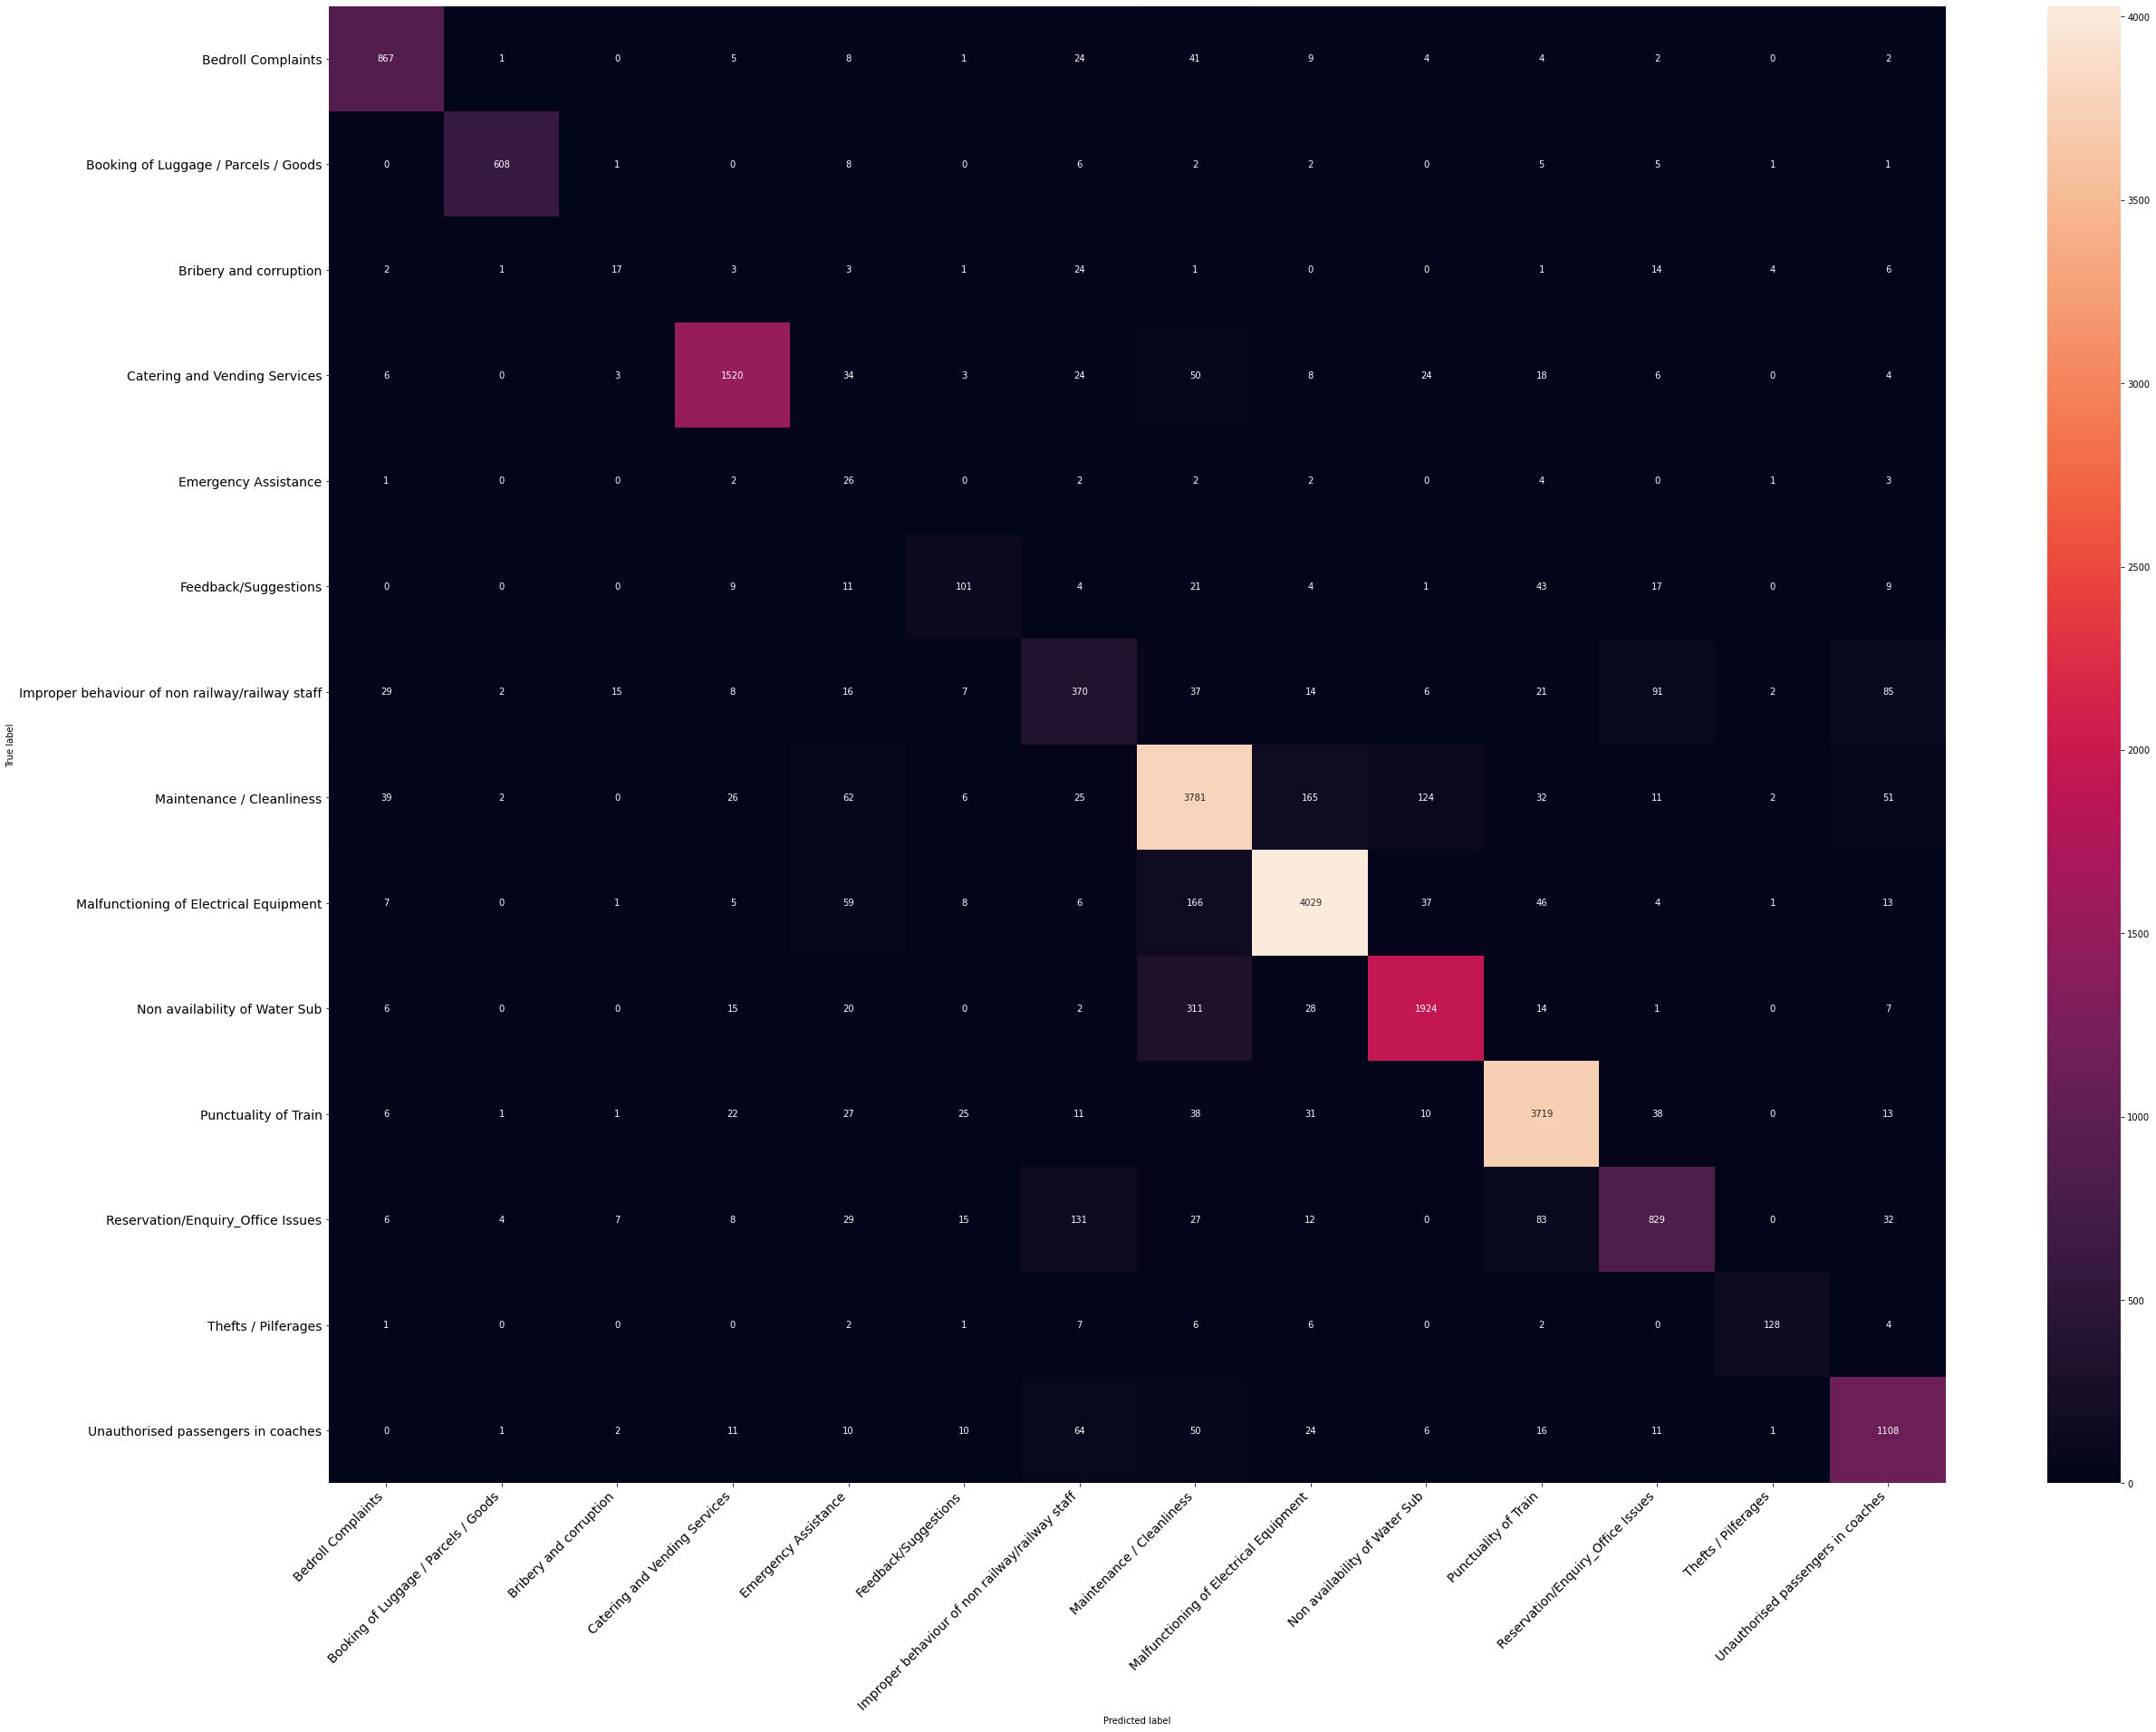

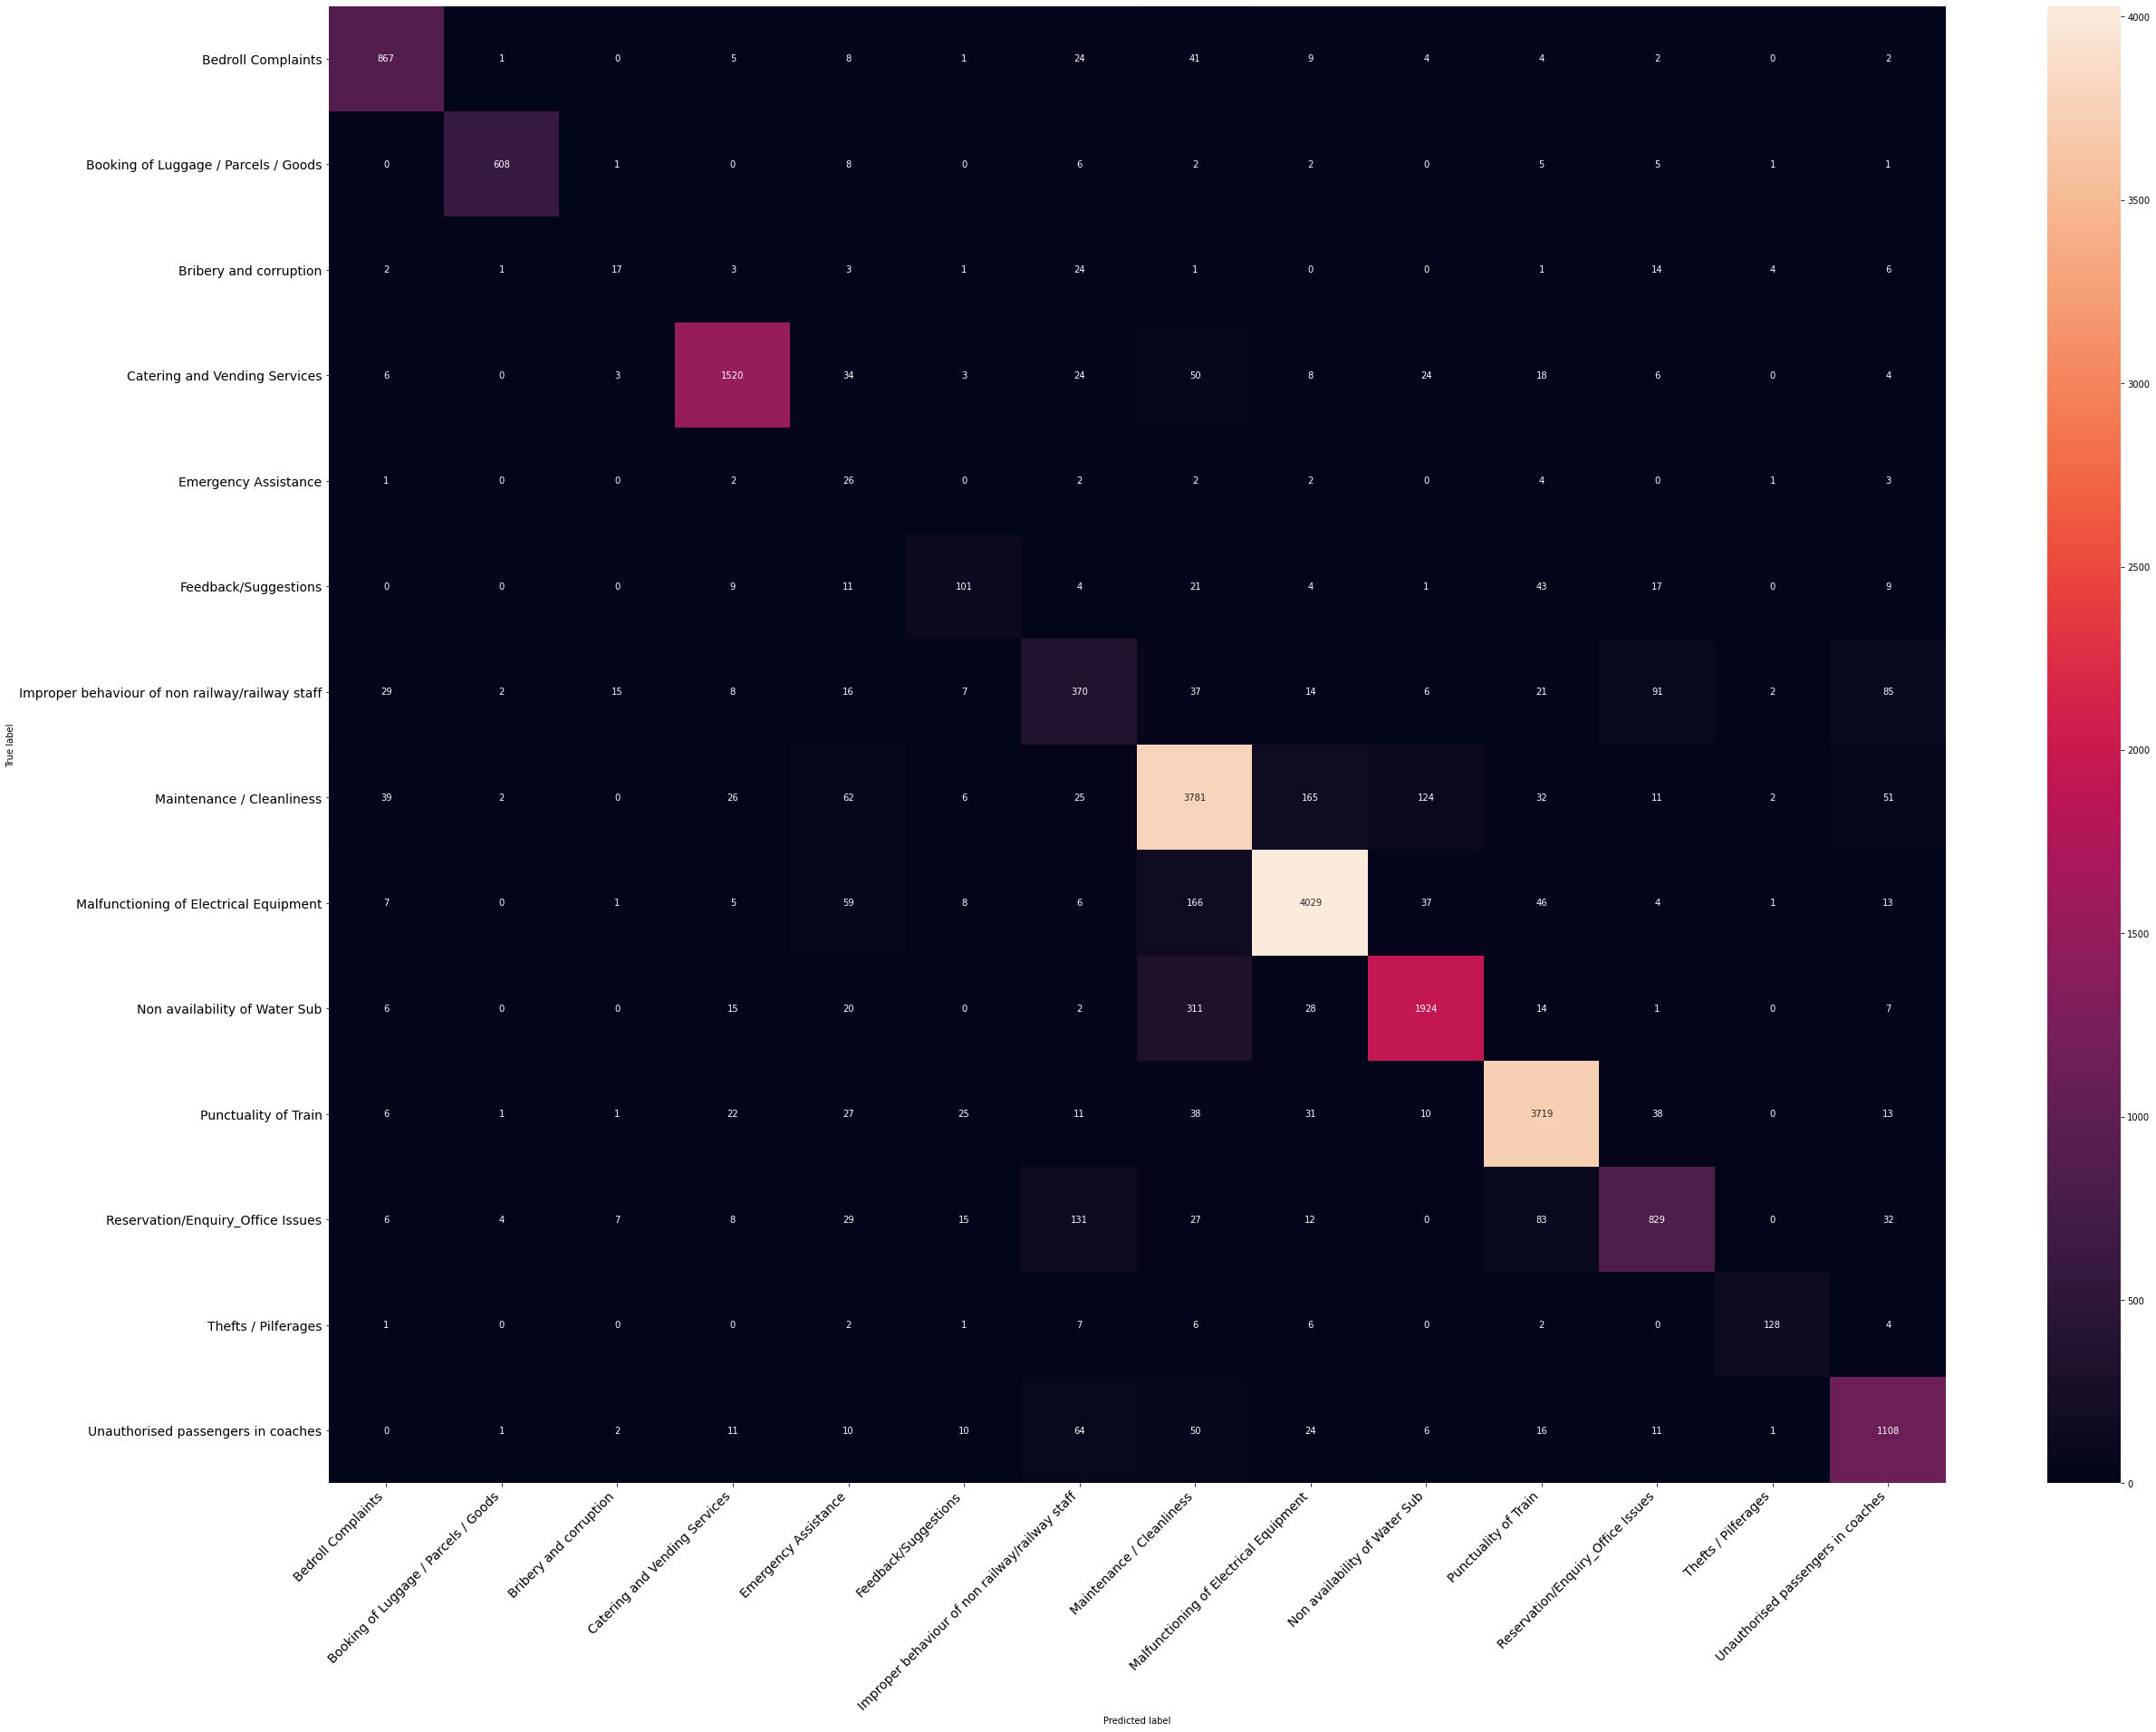

In [57]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
un_arr=np.unique(df.Complaint.values)
print_confusion_matrix(conf_mat,un_arr)

In [58]:
print(classification_report(Y_test, y_pred,target_names=un_arr))

                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.89      0.90      0.89       968
           Booking of Luggage / Parcels / Goods       0.98      0.95      0.97       639
                         Bribery and corruption       0.36      0.22      0.27        77
                  Catering and Vending Services       0.93      0.89      0.91      1700
                           Emergency Assistance       0.08      0.60      0.15        43
                           Feedback/Suggestions       0.57      0.46      0.51       220
Improper behaviour of non railway/railway staff       0.53      0.53      0.53       703
                      Maintenance / Cleanliness       0.83      0.87      0.85      4326
         Malfunctioning of Electrical Equipment       0.93      0.92      0.92      4382
                  Non availability of Water Sub       0.90      0.83      0.86      2328
                    